# Aprendizaje automático


## Regresión

__Grupo: ForeverTeam__

__Nombres de los estudiantes:__
- Diego Alejandro Rodríguez Pereira

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

## 1) Descripción de los datos

Carga el fichero de datos `airbnb.csv` en un dataframe. Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables. Estudia la distribución de precios.

In [1]:
import pandas as pd

filename = 'airbnb.csv'

df = pd.read_csv(filename)

df['instant_bookable'] = df['instant_bookable'].astype('category')
df['entire_home'] = df['entire_home'].astype('category')
df['private_room'] = df['private_room'].astype('category')
df['shared_room'] = df['shared_room'].astype('category')

#Elimnar las filas que tengan datos incompletos
df = df.dropna()
df = df.reset_index(drop=True)

df

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,1.0,52.358466,4.933843,2,8,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,1.0,52.363589,4.983353,3,0,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,1.0,52.375209,4.861647,3,8,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.0,52.387382,4.890457,2,41,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,1.0,52.384062,4.889877,3,0,0.844491,0,1,0,0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,43.0,52.382970,4.873389,3,10,1.815773,0,1,0,0,140.0
14994,4,1.0,2.0,1,1.0,52.347479,4.833644,4,2,5.687407,1,1,0,0,120.0
14995,2,1.0,1.0,1,1.0,52.370400,4.918489,1,5,1.620395,0,1,0,0,120.0
14996,3,1.0,1.0,1,1.0,52.389637,4.879580,2,7,1.777881,0,1,0,0,95.0


In [2]:
# Mostrar datos estadísticos de cada variable
df.describe()

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,price
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,2.880317,1.116215,1.390919,1.499333,3.372316,52.365312,4.889033,2.885051,17.797440,2.998582,130.050273
std,1.298492,0.343442,0.839649,0.940643,11.203593,0.015765,0.035010,7.252271,34.766613,1.610995,63.820328
min,1.000000,0.000000,0.000000,1.000000,0.000000,52.290308,4.753513,1.000000,0.000000,0.115801,19.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,52.355582,4.864839,2.000000,2.000000,1.948924,89.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,52.364960,4.886370,2.000000,7.000000,2.841338,115.000000
75%,4.000000,1.000000,2.000000,2.000000,1.000000,52.374805,4.907953,3.000000,18.000000,3.577086,150.000000
max,17.000000,8.000000,10.000000,16.000000,106.000000,52.426224,5.027689,523.000000,496.000000,11.842162,440.000000


### Análisis de los datos

El **conjunto de datos del fichero cargado nos muestra las características de los alojamientos** de Airbnb en Ámsterdan. El **significado de las variables** es el siguiente:

- **Accommodates:** indica el número de huéspedes permitidos
- **Bathrooms:** indica el número de baños en el alojamiento
- **Bedrooms:** indica el número de habitaciones en el alojamiento
- **Guests included:** número de invitados que se permiten
- **Host Listings Count:** número de propiedades del arrendador/host
- **Latitude/Longitud:** coordenadas del alojamiento
- **Minimun Nights:** número mínimo de noches para alquilar el alojamiento
- **Number of reviews:** número de opiniones sobre el alojamiento
- **Distance centre:** distancia del alojamiento al centro de la ciudad
- **Instant bookable (0-1):** indica si se puede reservar de forma instantánea o no
- **Entire home (0-1):** indica si el tipo de alojamiento es una casa entera o no
- **Private room (0-1):** indica si el tipo de alojamiento es una habitación privada o no
- **Shared room (0-1):** indica si el tipo de alojamiento es una habitación compartida o no
- **Price:** precio del alojamiento por noche

Las variables cuyo valor están en el rango 0-1 (entire home, private room, shared room) son variables categóricas. La **distribución de precios** se distribuye en un rango de 19€ hasta 440€ por noche, siendo la media de 130€ por noche, lo cual indica que hay un mayor número de alojamientos con precios bajos que con precios elevados. 

## 2) Selección de variables

#### Coeficientes de Correlación

In [3]:
# coeficientes de correlación entre pares de variables
# Valor cercano a 1 indica correlación directa
# Valor cercano a -1 indica correlación inversa
# Valor cercano a 0 indica no correlación
#data[data.columns[1:]].corr()['special_col'][:-1]
df[df.columns[0:]].corr(method='pearson')['price']

accommodates           0.552183
bathrooms              0.283759
bedrooms               0.517237
guests_included        0.338739
host_listings_count    0.109141
latitude               0.027922
longitude              0.035887
minimum_nights         0.007708
number_of_reviews     -0.088437
distance_centre       -0.204698
price                  1.000000
Name: price, dtype: float64

Las variables que están relacionadas con el precio por un valor de correlación de al menos 0.2 son:

- **`Price-Accommodates`:** este par de variables se relaciona de forma directa ya que al aumentar el número de huéspedes por alojamiento también aumenta el precio.
- **`Price-Bathrooms`:** este par de variables también se relaciona de forma directa puesto que un mayor número de baños en un alojamiento incrementa el valor del mismo.
- **`Price-Bedrooms`:** estas variables también se relacionan de forma directa por la misma razón que en el caso anterior.
- **`Price-Guests Included`:** estas variables se relacionan de forma directa, ya que entre más invitados más caro.
- **`Price-Distance Centre`:** en este caso las variables se relacionan de forma inversa ya que al aumentar la distancia del alojamiento al centro de la ciudad disminuye el precio. El hecho de que un alojamiento sea céntrico incrementa su valor.

In [4]:
df2 = df.copy()
df2 = df2.drop(['host_listings_count', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
                'instant_bookable', 'shared_room'],axis=1)
df2

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room,price
0,4,2.0,2.0,1,3.279483,1,0,160.0
1,4,1.0,2.0,2,5.951843,1,0,120.0
2,2,1.0,1.0,1,2.601055,1,0,99.0
3,2,1.0,1.0,1,1.095138,0,1,100.0
4,2,1.0,1.0,1,0.844491,1,0,175.0
...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,1.815773,1,0,140.0
14994,4,1.0,2.0,1,5.687407,1,0,120.0
14995,2,1.0,1.0,1,1.620395,1,0,120.0
14996,3,1.0,1.0,1,1.777881,1,0,95.0


## 3) Normalización

Hemos decidido escalar los datos ya que el rango de las variables es distinto y para entrenar redes neuronales es conveniente escalar los datos. Ya que a pesar de que el MLP puede tratar con variables sin escalar, si lo hacemos disminuimos el tiempo de entrenamiento y a su vez evitamos los mínimos locales en la optimización del error.

In [5]:
df3 = df2.copy()
df3 = df3.drop(['price'], axis=1)
x_data = df3.values

In [6]:
df_target = df2['price']
x_target = df_target.values

In [7]:
from sklearn.preprocessing import MinMaxScaler

#Variable que contiene (en un array) la descripción/datos de los establecimientos
df3 = df2.copy()
df3 = df3.drop(['price'], axis=1)
x_data = df3.values

#Variable que contiene (en un array) los precios de los establecimientos
df_target = df2['price']
x_target = df_target.values

# Transformamos las variables de entrada
scaler_x = MinMaxScaler()
scaler_x.fit(x_data)
data_scaled=scaler_x.transform(x_data)

# Y también transformamos la variable de salida
scaler_y = MinMaxScaler()
scaler_y.fit(x_target.reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
target_scaled=scaler_y.transform(x_target.reshape(-1, 1))

In [8]:
data_scaled

array([[0.1875    , 0.25      , 0.2       , ..., 0.26979228, 1.        ,
        0.        ],
       [0.1875    , 0.125     , 0.2       , ..., 0.49768568, 1.        ,
        0.        ],
       [0.0625    , 0.125     , 0.1       , ..., 0.2119373 , 1.        ,
        0.        ],
       ...,
       [0.0625    , 0.125     , 0.1       , ..., 0.12830863, 1.        ,
        0.        ],
       [0.125     , 0.125     , 0.1       , ..., 0.14173871, 1.        ,
        0.        ],
       [0.0625    , 0.125     , 0.1       , ..., 0.21353482, 1.        ,
        0.        ]])

In [9]:
target_scaled

array([[0.33491686],
       [0.23990499],
       [0.19002375],
       ...,
       [0.23990499],
       [0.18052257],
       [0.23990499]])

## 4) Entrenamiento y selección

## Buscamos el mejor coeficiente de regularización usando validación cruzada

In [10]:
RANDOM_STATE=333

## Red Neuronal con una capa oculta de 200 neuronas

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, data_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.012678058326870708,
  -0.012226656573093376,
  -0.01227486731648672,
  -0.01225004077782114,
  -0.012243364484804887,
  -0.012228302978063621],
 [0.0003966419209094001,
  0.00027398866706305716,
  0.00020223707355082873,
  0.00020722075014518695,
  0.0002049348239465782,
  0.00021794733926554157])

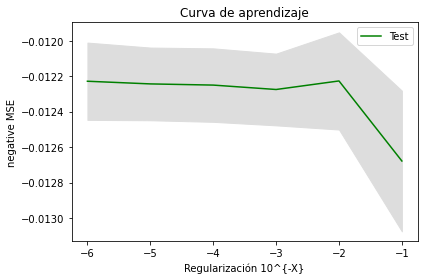

In [12]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Red Neuronal con dos capas ocultas de 100 neuronas cada una

In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100,100), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, data_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.012723697054611205,
  -0.011979667476459645,
  -0.011740184971338063,
  -0.011704574246138705,
  -0.01169437301714911,
  -0.01175465244045318],
 [0.0003885895981672428,
  0.0003546605235645444,
  0.0004269019094578842,
  0.00044308683145133766,
  0.00043602684046625774,
  0.00045943793468267077])

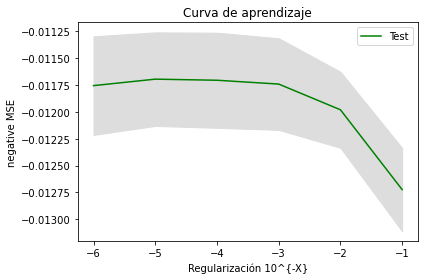

In [14]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## 5) Medición del error

#### Nota:

Hemos escogido la configuración de **dos capas de 100 neuronas cada una**.

In [17]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
regul_param=0.000001
mlp = MLPRegressor(hidden_layer_sizes=(100,100), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, data_scaled, target_scaled.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled.reshape(-1, 1))

In [18]:
errors = np.abs(x_target - predicts.reshape(1, -1))
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(x_target)

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

Error medio: 31.734018834626507
Desviación típica: 32.76727336922803
Error medio en %: 24.401347273138413


### _¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?_

**Error Medio:** 31.73€

El modelo **no es lo suficientemente bueno**, de hecho es un modelo malo debido a que el error en euros es una cifra bastante significativa, el error podría ser aceptable si esta cifra se tratase de unos pocos euros o céntimos.

Sin embargo, depende del precio que estemos hablando. Si aplicamos este error a un establecimiento económico este error sería, como poco, inaceptable. Si hablamos de un establecimiento medio, sería un error poco aceptable. En cambio si hablammos de un establecimiento caro, este error puede llegar a ser aceptable.

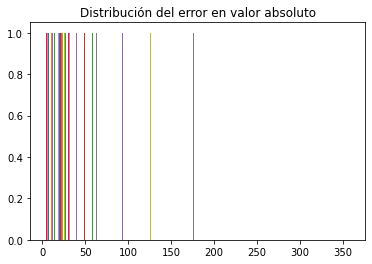

In [19]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

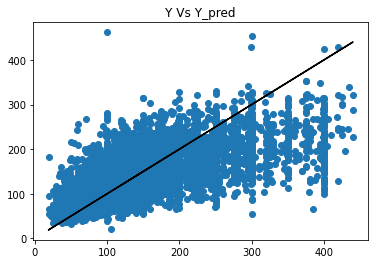

In [20]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(x_target, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(x_target, x_target, color='k') 

plt.title('Y Vs Y_pred')
plt.show()

### _¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué se producen esos errores?_

En primer lugar, notamos que en el conjunto de datos tenemos **menos datos de establecimientos con precio alto que de precio bajo y medio**, ya que la media de los precios se encuentra en los 139€ mientras que el establecimiento más caro se situa en los 440€. Esta escasez de datos para un rango de precios altos provoca que a nuestro modelo le dificulte más ajustarse al precio de los alojamientos más caros. 

A su vez, creemos que otro de los motivos que hace que nuestro modelo no sea eficaz a la hora predecir el precio de alojamientos caros es la **falta de consideración de muchas variables** de las que afectan especialmente a estos, como lo podría ser la calidad y tamaño de los muebles, los servicios incluidos en el alojamiento (dejar la nevera llena, degustación de vinos o productos locales, baño con suministros, recomendaciones a lugares turísticos...). A diferencia de los precios bajos y medio en los que se ofrecen servicios básicos y, por tanto, las variables de nuestro modelo pueden llegar a ser suficientes para describirlos. 

Podemos observar en el diagrama como se sobreestima el precio para los alojamientos con precios medio-bajos, ya que se benefician de la ausencia de algunas variables, mientras que para los alojamientos con precios altos se subestima su precio y además se comete mayor error. 

En resumen, **se están ignorando muchos detalles en lo referente a los alojamientos y a sus características**, y esto hace que el error de nuestro modelo sea mayor. No es lo mismo 3 habitaciones pequeñas, que 3 habitaciones grandes, ni es lo mismo un baño simple que un baño con jacuzzi. Sin embargo, para nuestro modelo es lo mismo un alojamiento con 1 habitación en un sótano que un alojamiento con 1 suite en un ático con vistas a la ciudad de Ámsterdam.